In [1]:
import pandas as pd
# import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 불러오기


In [2]:
df_sk = pd.read_csv('./Data/상권매칭테이블.csv', encoding='euc-kr')
df_sk.head()

,SUD_CD,SUD_NM,ADSTRD_CD,ADSTRD_NM,SIGNGU_CD,SIGNGU_NM,TRDAR_SE_CD,TRDAR_SE_NM,TRDAR_NO,TRDAR_NM
0,1123000009,답십리1동_SE_039,11230600,답십리1동,11230,동대문구,A,골목상권,3110212,답십리초등학교
1,1123000011,답십리1동_SE_035,11230600,답십리1동,11230,동대문구,A,골목상권,3110212,답십리초등학교
2,1123000014,답십리1동_SE_031,11230600,답십리1동,11230,동대문구,A,골목상권,3110212,답십리초등학교
3,1123000015,답십리1동_SE_032,11230600,답십리1동,11230,동대문구,A,골목상권,3110212,답십리초등학교
4,1123000021,답십리1동_ES_026,11230600,답십리1동,11230,동대문구,A,골목상권,3110212,답십리초등학교


In [3]:
df_sell = pd.read_csv('./Data/TBSM_SUD_SELNG_QU.csv', encoding='euc-kr')
df_sell.head()

,STDR_YYQU_CD,SUD_CD,SVC_INDUTY_CD,THSMON_SELNG_AMT,THSMON_SELNG_CO,MDWK_SELNG_RATE,WKEND_SELNG_RATE,MON_SELNG_RATE,TUES_SELNG_RATE,WED_SELNG_RATE,...,TMZON_17_21_SELNG_CO,TMZON_21_24_SELNG_CO,ML_SELNG_CO,FML_SELNG_CO,AGRDE_10_SELNG_CO,AGRDE_20_SELNG_CO,AGRDE_30_SELNG_CO,AGRDE_40_SELNG_CO,AGRDE_50_SELNG_CO,AGRDE_60_ABOVE_SELNG_CO
0,20191,1123000001,CS000000,1419477091,35961,86.7,13.3,17.2,16.2,15.3,...,5944,225,21770,13935,47,5829,5544,5759,8204,10323
1,20191,1123000001,CS100000,38463092,243,88.1,11.9,2.3,10.1,21.8,...,0,96,201,30,0,0,72,106,53,0
2,20191,1123000001,CS100009,38463092,243,88.1,11.9,2.3,10.1,21.8,...,0,96,201,30,0,0,72,106,53,0
3,20191,1123000001,CS200000,1119143508,20688,86.8,13.2,16.6,18.1,14.4,...,2417,67,12648,7796,20,2715,2725,3288,4990,6707
4,20191,1123000001,CS200006,517445606,16737,82.6,17.4,12.1,14.3,16.9,...,1461,0,10195,6298,0,1947,1858,2015,4407,6267


In [4]:
df = pd.merge(left = df_sk , right = df_sell, how = "inner", on = "SUD_CD")
df.head()

,SUD_CD,SUD_NM,ADSTRD_CD,ADSTRD_NM,SIGNGU_CD,SIGNGU_NM,TRDAR_SE_CD,TRDAR_SE_NM,TRDAR_NO,TRDAR_NM,...,TMZON_17_21_SELNG_CO,TMZON_21_24_SELNG_CO,ML_SELNG_CO,FML_SELNG_CO,AGRDE_10_SELNG_CO,AGRDE_20_SELNG_CO,AGRDE_30_SELNG_CO,AGRDE_40_SELNG_CO,AGRDE_50_SELNG_CO,AGRDE_60_ABOVE_SELNG_CO
0,1123000009,답십리1동_SE_039,11230600,답십리1동,11230,동대문구,A,골목상권,3110212,답십리초등학교,...,689,0,1543,1290,3,113,253,149,1479,836
1,1123000009,답십리1동_SE_039,11230600,답십리1동,11230,동대문구,A,골목상권,3110212,답십리초등학교,...,603,0,1505,1134,3,113,194,149,1460,720
2,1123000009,답십리1동_SE_039,11230600,답십리1동,11230,동대문구,A,골목상권,3110212,답십리초등학교,...,556,0,1437,1093,0,81,148,130,1454,717
3,1123000009,답십리1동_SE_039,11230600,답십리1동,11230,동대문구,A,골목상권,3110212,답십리초등학교,...,47,0,68,41,3,32,46,19,6,3
4,1123000009,답십리1동_SE_039,11230600,답십리1동,11230,동대문구,A,골목상권,3110212,답십리초등학교,...,86,0,38,156,0,0,59,0,19,116


In [5]:
# "기준 년분기, 표준단위구역, 당월_매출_금액, 상권코드" 컬럼만 선택 (차례대로 대응됨)
df1 = df[['STDR_YYQU_CD', 'SUD_CD', 'THSMON_SELNG_AMT', 'TRDAR_SE_CD']]  
df1

,STDR_YYQU_CD,SUD_CD,THSMON_SELNG_AMT,TRDAR_SE_CD
0,20191,1123000009,105321243,A
1,20191,1123000009,74606575,A
2,20191,1123000009,71556937,A
3,20191,1123000009,3049638,A
4,20191,1123000009,30714668,A
...,...,...,...,...
180924,20232,1129003504,24241935,R
180925,20232,1129003504,24241935,R
180926,20233,1129003504,19451613,R
180927,20233,1129003504,19451613,R


In [6]:
# A, D, R은 각각 골목, 발달, 전통시장 상권을 나타냄
df_A, df_D, df_R = df1[df1['TRDAR_SE_CD']=='A'], df1[df1['TRDAR_SE_CD']=='D'], df1[df1['TRDAR_SE_CD']=='R']
df_A, df_D, df_R = df_A.drop(columns=['TRDAR_SE_CD']), df_D.drop(columns=['TRDAR_SE_CD']), df_R.drop(columns=['TRDAR_SE_CD'])

In [7]:
df_A

,STDR_YYQU_CD,SUD_CD,THSMON_SELNG_AMT
0,20191,1123000009,105321243
1,20191,1123000009,74606575
2,20191,1123000009,71556937
3,20191,1123000009,3049638
4,20191,1123000009,30714668
...,...,...,...
113970,20233,1129003916,185802576
113971,20233,1129003916,14932306
113972,20233,1129003916,186169315
113973,20233,1129003916,24000000


# 표준단위구역의 월별 (구역 내) 매출 평균 그래프


In [14]:

def show(df):
    for code in list(set(df['SUD_CD'].values)):
        tmp = df[df['SUD_CD'] == code].drop(columns=['SUD_CD'])
        groupby_result = tmp.groupby('STDR_YYQU_CD').mean()
        
        plt.bar(groupby_result.index, groupby_result['THSMON_SELNG_AMT'], label=f'SUD_CD {code}')

    plt.xlabel('STDR_YYQU_CD')
    plt.ylabel('Mean THSMON_SELNG_AMT')
    plt.legend()
    plt.show()



In [28]:
def show_multiple(dfs):
    fig, axs = plt.subplots(1, len(dfs), figsize=(15, 5))  # Adjust figsize as needed

    for i, df in enumerate(dfs):
        for code in list(set(df['SUD_CD'].values)):
            tmp = df[df['SUD_CD'] == code].drop(columns=['SUD_CD'])
            groupby_result = tmp.groupby('STDR_YYQU_CD').mean()
            
            axs[i].bar(groupby_result.index, groupby_result['THSMON_SELNG_AMT'], label=f'SUD_CD {code}')

        axs[i].set_title(f'Dataframe {i + 1}')
        axs[i].set_xlabel('Year/Quarter')
        axs[i].set_ylabel('Sales')


    plt.tight_layout()
    plt.show()

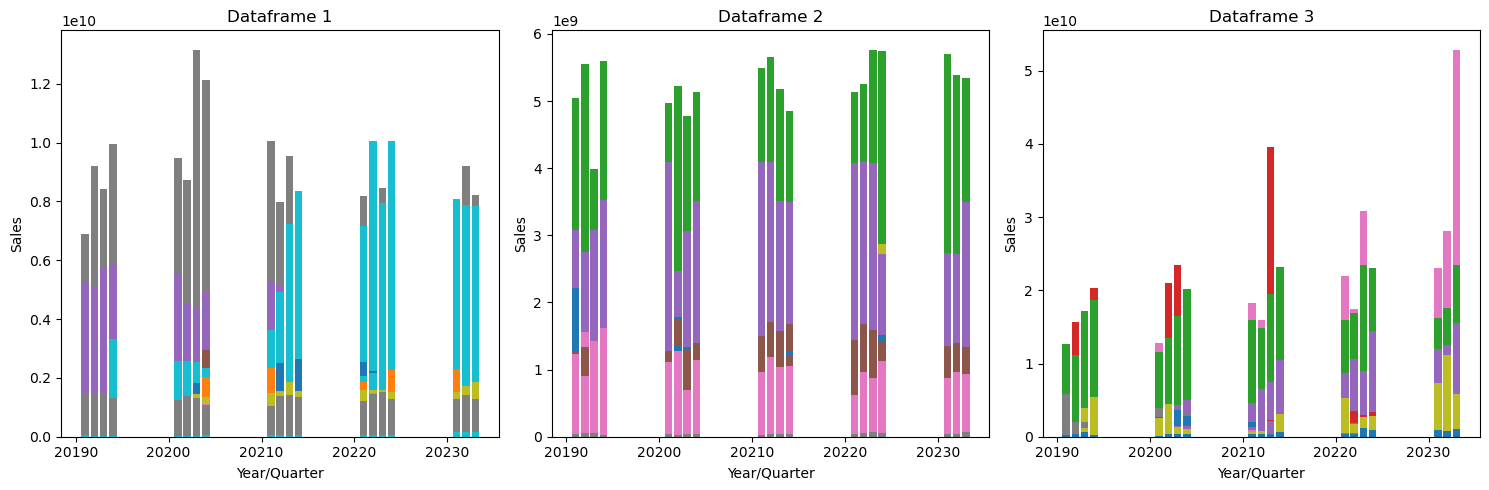

In [29]:
show_multiple([df_A,df_D,df_R])

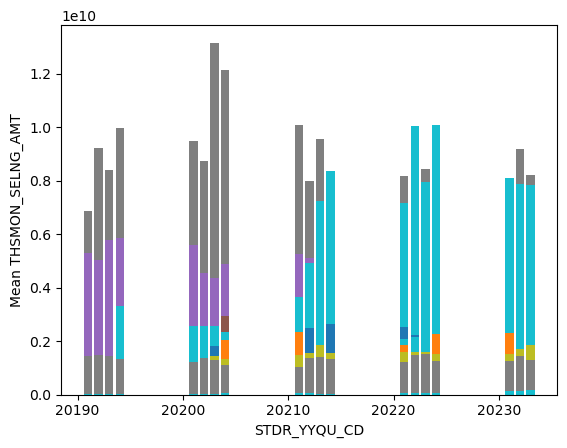

In [11]:
show(df_A)

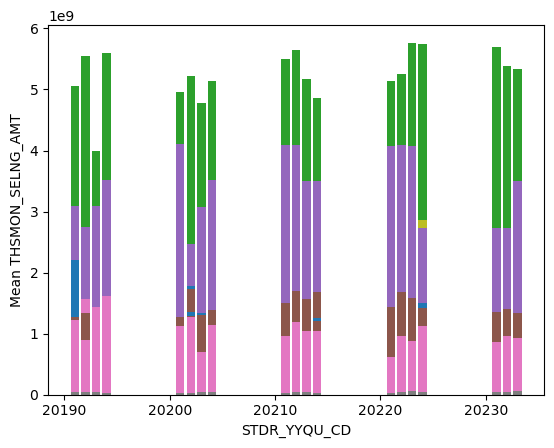

In [12]:
show(df_D)

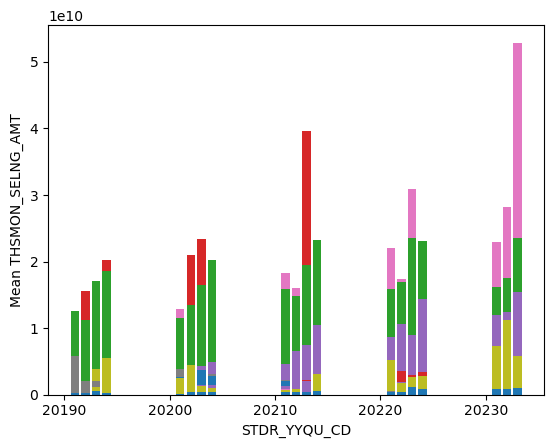

In [13]:
show(df_R)

In [47]:
from scipy.stats.mstats import winsorize

def show_winsorized_means(dfs, trim_percent=5):
    fig, axs = plt.subplots(1, len(dfs), figsize=(15, 5))  # Adjust figsize as needed

    for i, df in enumerate(dfs):
        winsorized_amt = winsorize(df['THSMON_SELNG_AMT'], limits=(trim_percent/100.0, trim_percent/100.0))
        df['THSMON_SELNG_AMT_winsorized'] = winsorized_amt
        
        for code in list(set(df['SUD_CD'].values)):
            tmp = df[df['SUD_CD'] == code].drop(columns=['SUD_CD'])
            groupby_result = tmp.groupby('STDR_YYQU_CD')['THSMON_SELNG_AMT_winsorized'].mean()
            
            axs[i].bar(groupby_result.index, groupby_result, label=f'SUD_CD {code}')

        axs[i].set_title(f'Dataframe {i + 1} (Winsorized Means)')
        axs[i].set_xlabel('Year/Quarter')
        axs[i].set_ylabel('Winsorized Mean Sales')
        
    plt.tight_layout()
    plt.show()

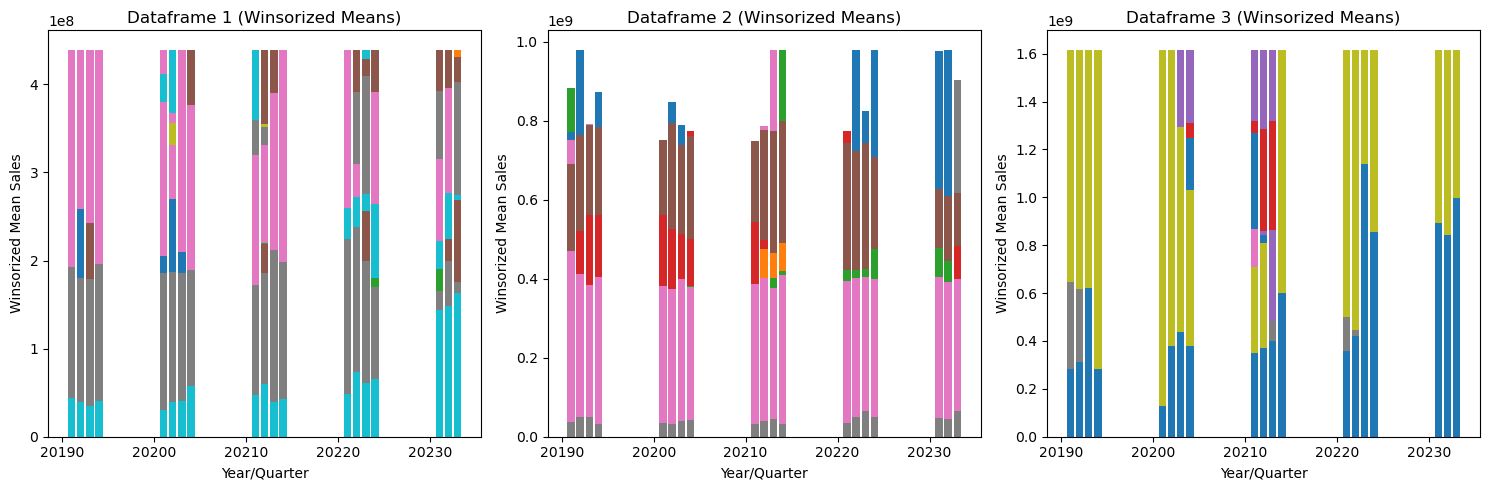

In [48]:
show_winsorized_means([df_A,df_D,df_R],10)